Importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, classification_report

In [5]:
df = pd.read_csv('Cancer_Data.csv', na_values='?')

Understanding the data

In [6]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Deleting the column Unnamed, since it all containes nullable data

In [9]:
df = df.drop(columns = ['id','Unnamed: 32'])
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

In [10]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

Defining a command for comparison between Malignant and Bening cancer based on the feature

In [12]:
def plot_comparison(feature, group1, group2, bins):
    plt.figure(figsize=(20,10))

    if group1['diagnosis'].unique()[0] == 'M':
        m_class = group1
        b_class = group2
    else:
        b_class = group1
        m_class = group2

    plt.subplot(2,2,1)
    ax1 = sns.histplot(data=b_class, x=f'{feature}_mean', bins=bins, kde=True)
    ax1.set_title(f'Mean {feature} - Benign')
    ax1.set_xlabel(None)

    plt.subplot(2,2,2)
    ax2 = sns.histplot(data=m_class, x=f'{feature}_mean', bins=bins, kde=True, color='red')
    ax2.set_title(f'Mean {feature} - Malignant')
    ax2.set_xlabel(None)

    plt.subplot(2,2,3)
    ax3 = sns.histplot(data=b_class, x=f'{feature}_worst', bins=bins, kde=True)
    ax3.set_title(f'Extreme {feature} values - Benign')
    ax3.set_xlabel(None)

    plt.subplot(2,2,4)
    ax4 = sns.histplot(data=m_class, x=f'{feature}_worst', bins=bins, kde=True, color='red')
    ax4.set_title(f'Extreme {feature} values - Malignant')
    ax4.set_xlabel(None)

    plt.show()

In [13]:
b_tumor = df.loc[df['diagnosis'] == 'B']
m_tumor = df.loc[df['diagnosis'] == 'M']

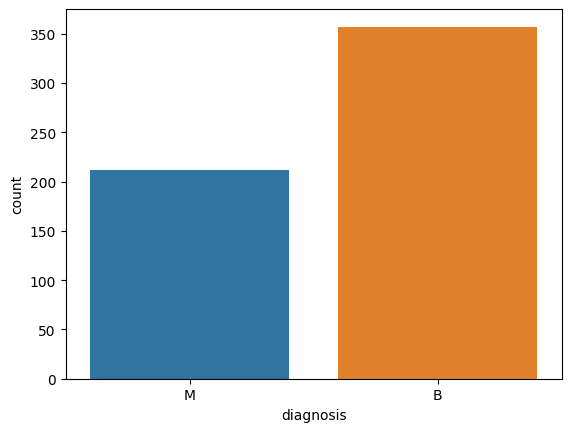

In [14]:
sns.countplot(data=df, x='diagnosis')
plt.show()

Making the analysis between the 2 types of cancer based on the features present in the dataset

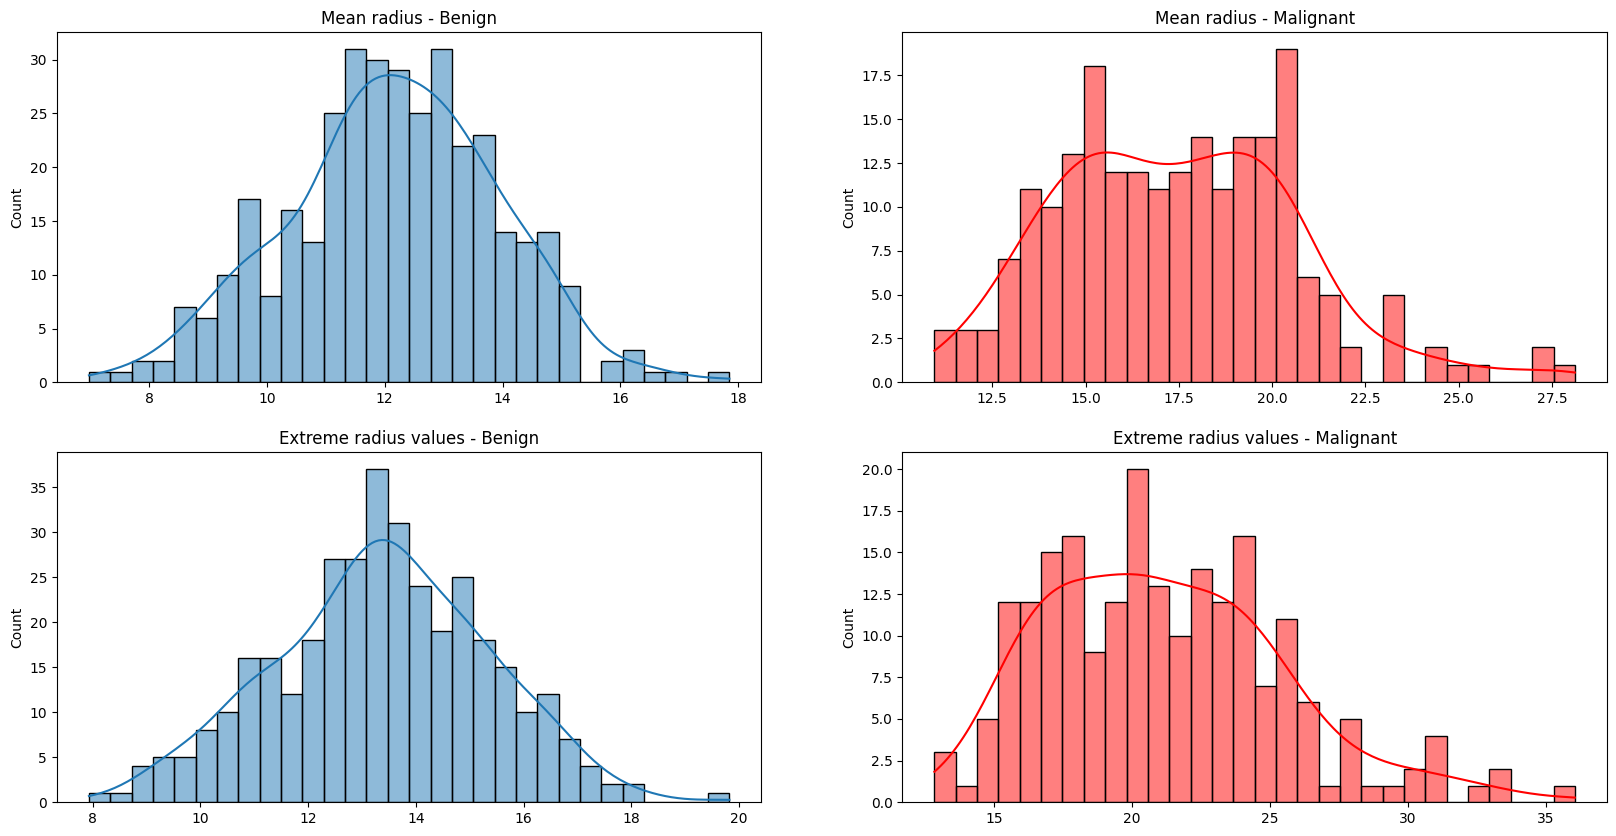

In [15]:
plot_comparison('radius', b_tumor, m_tumor, bins=30)

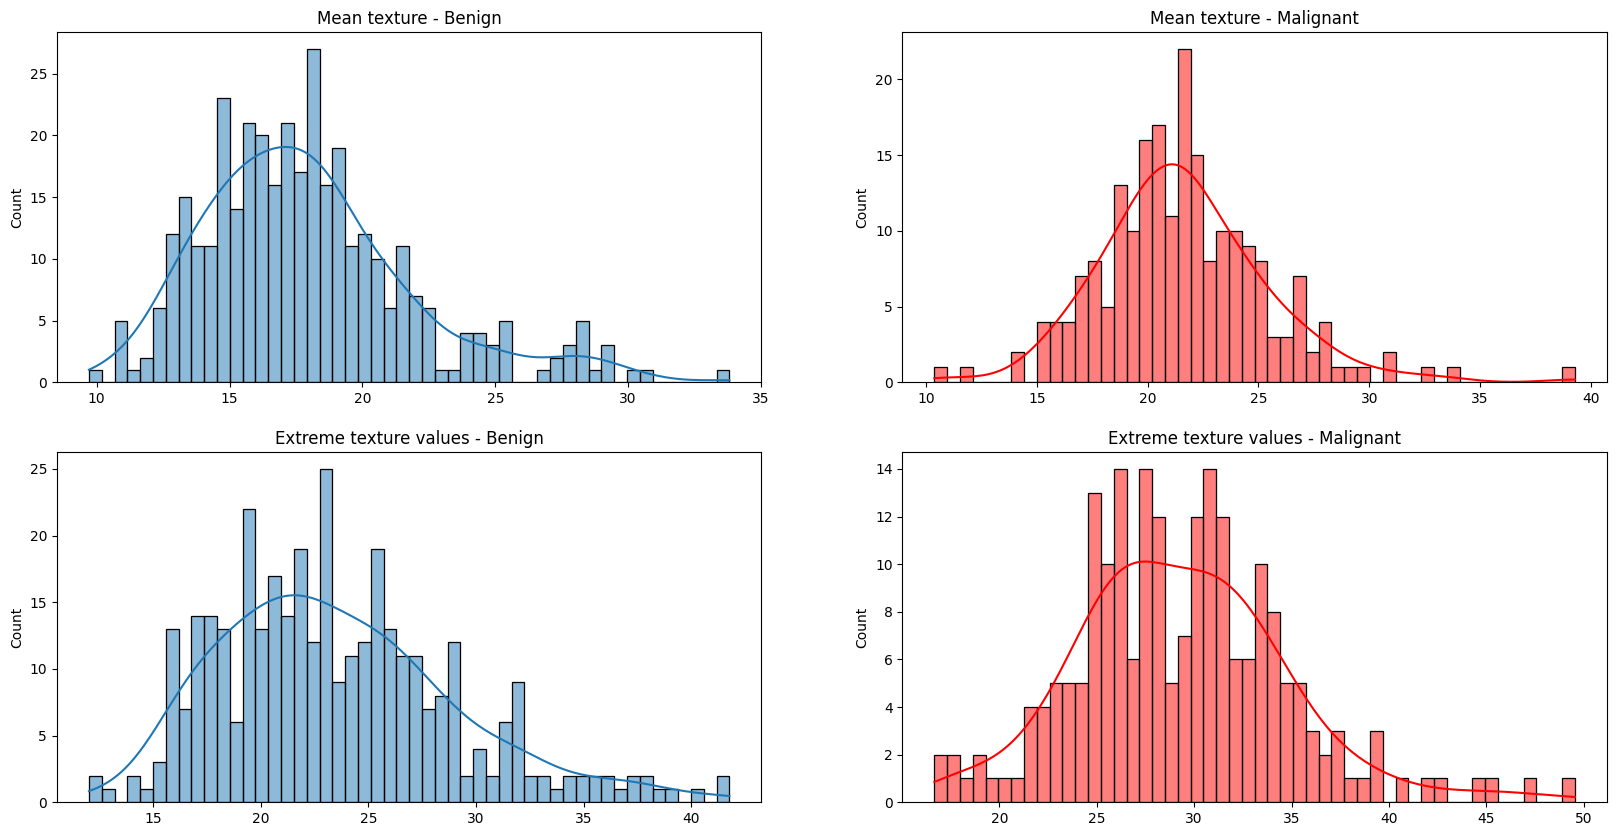

In [16]:
plot_comparison('texture', b_tumor, m_tumor, bins=50)

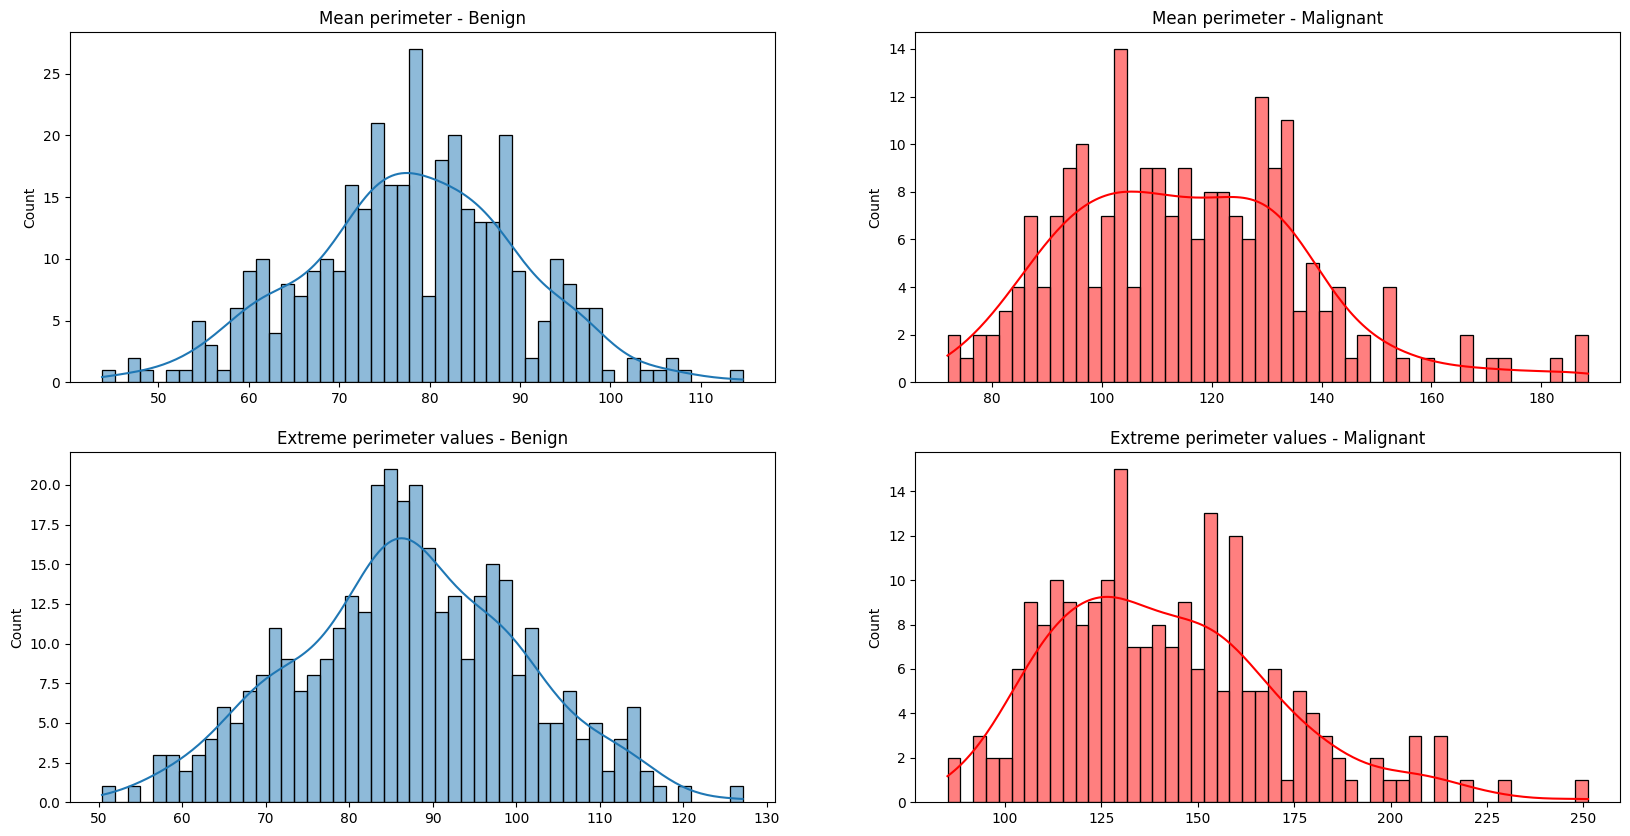

In [17]:
plot_comparison('perimeter', b_tumor, m_tumor, bins=50)

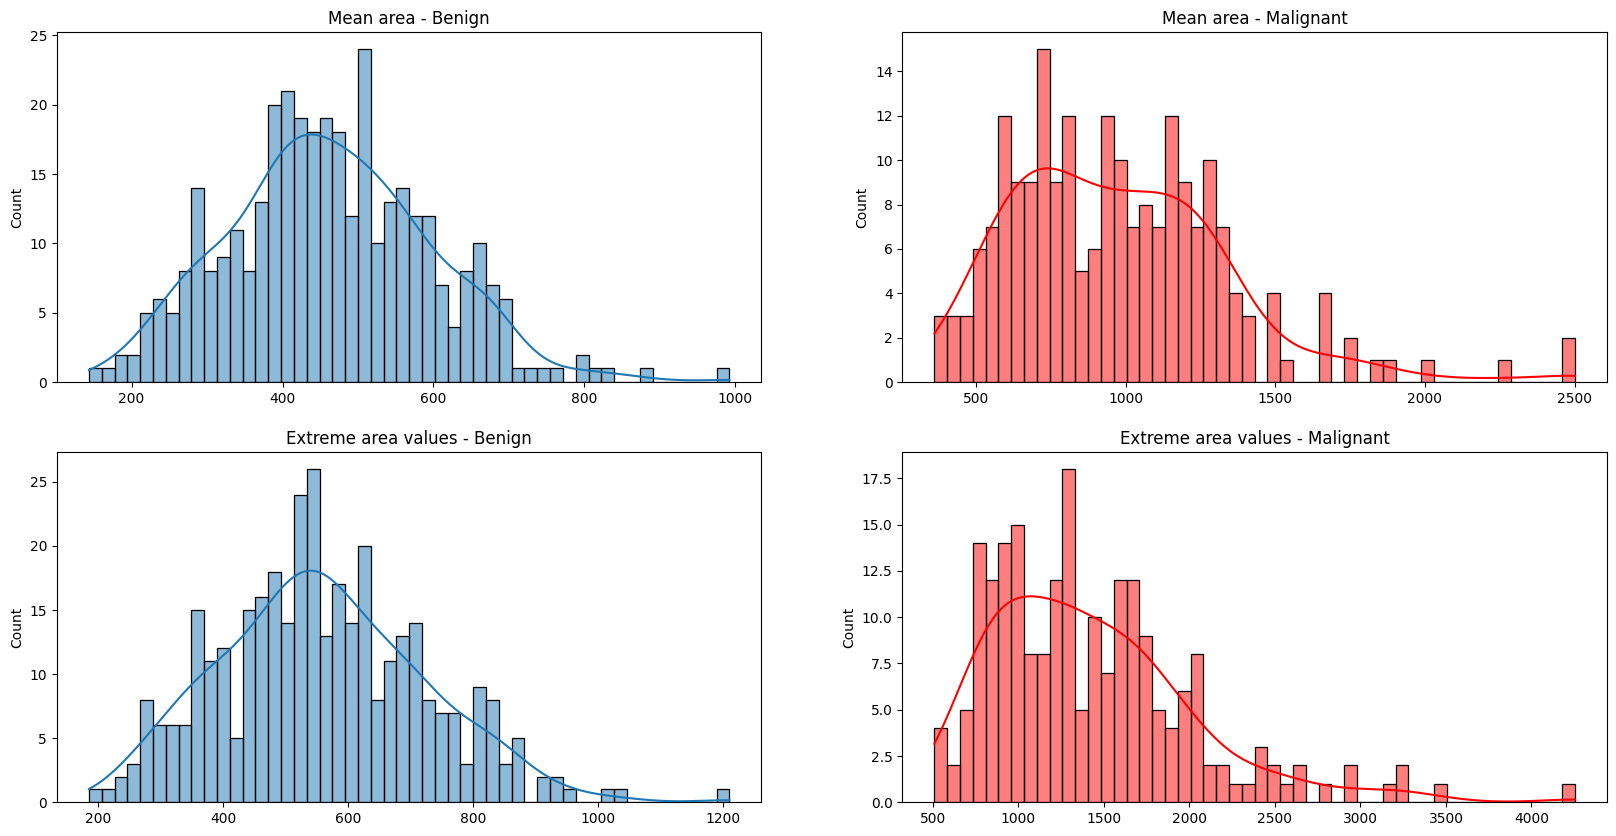

In [18]:
plot_comparison('area', b_tumor, m_tumor, bins=50)

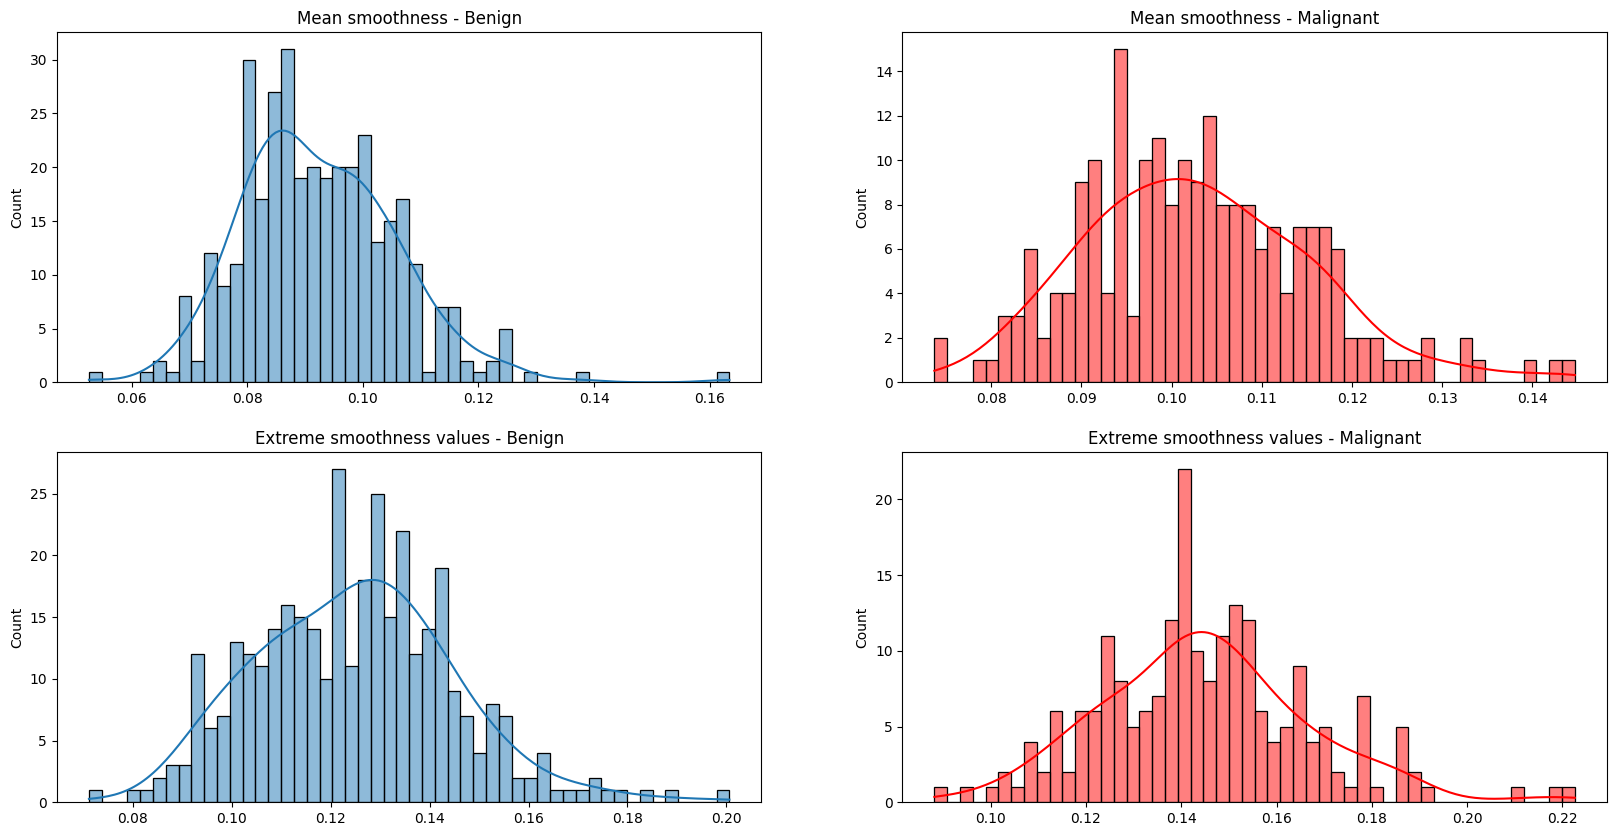

In [19]:
plot_comparison('smoothness', b_tumor, m_tumor, bins=50)

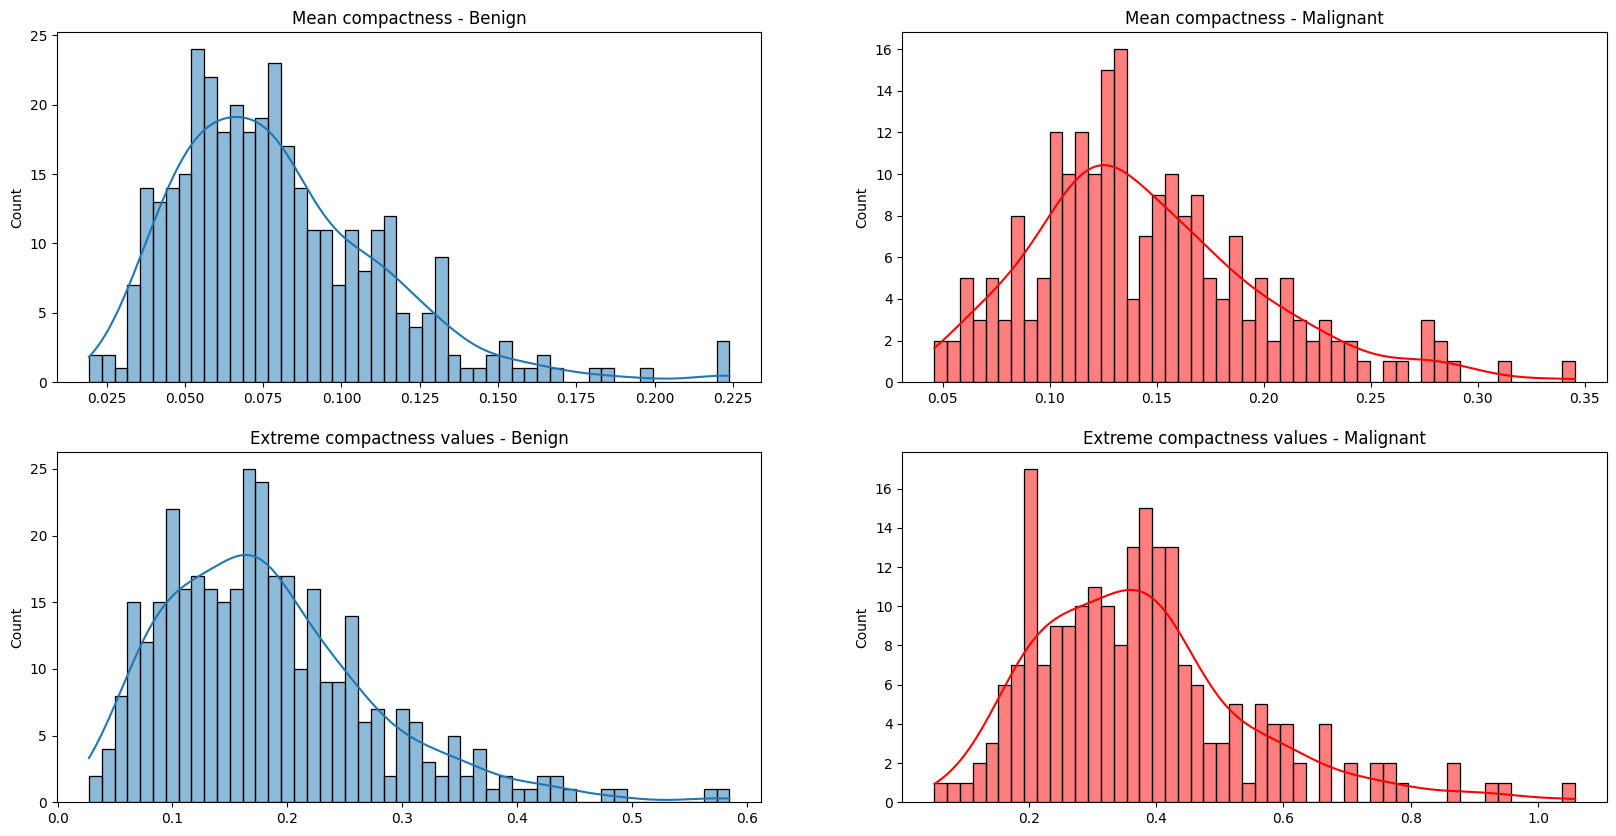

In [20]:
plot_comparison('compactness', b_tumor, m_tumor, bins=50)

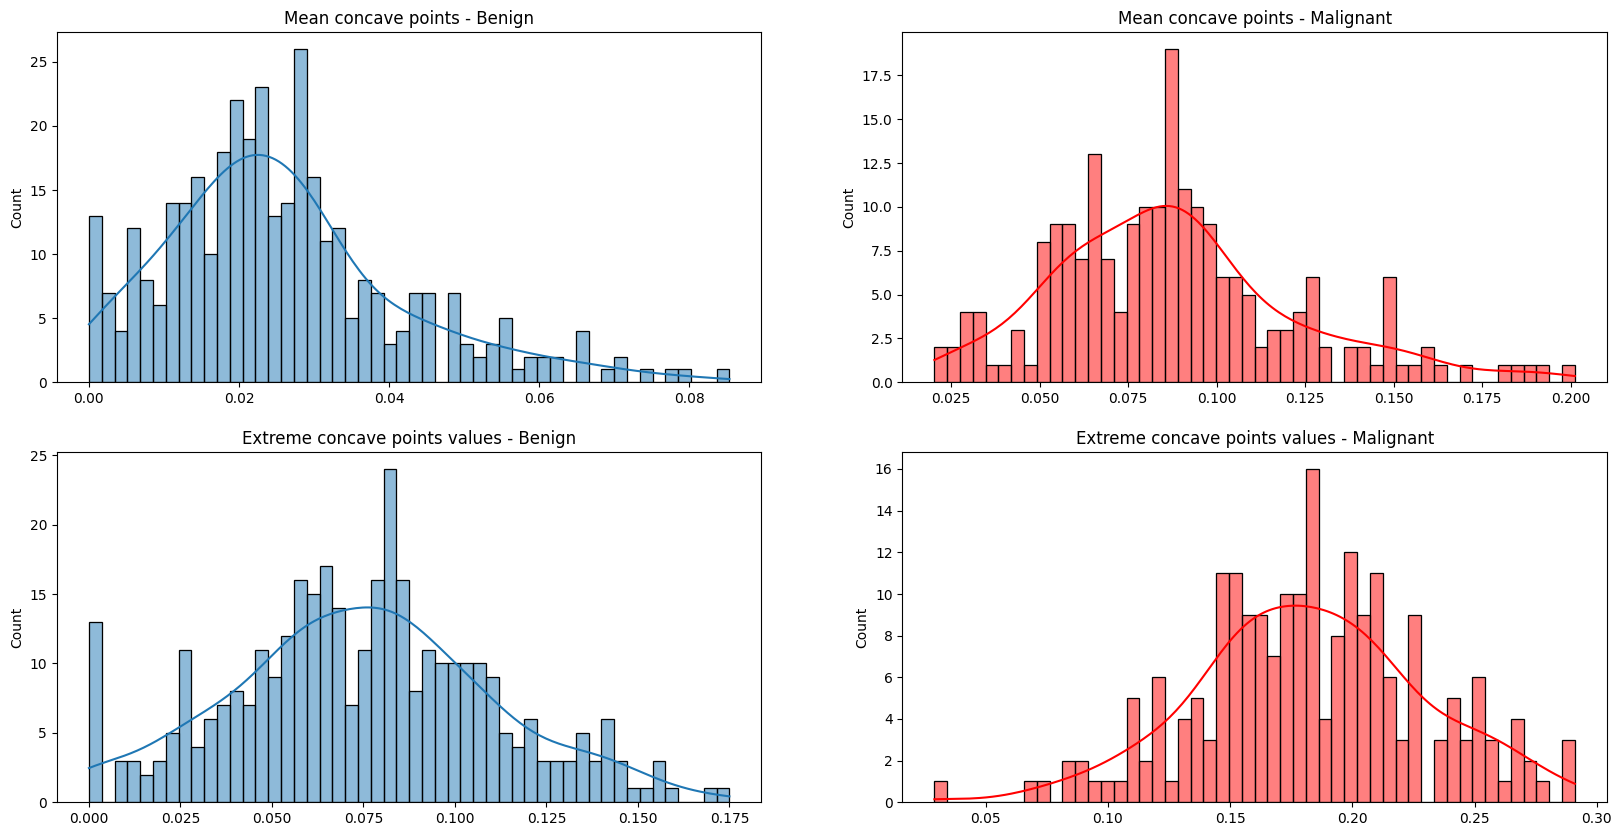

In [21]:
plot_comparison('concave points', b_tumor, m_tumor, bins=50)

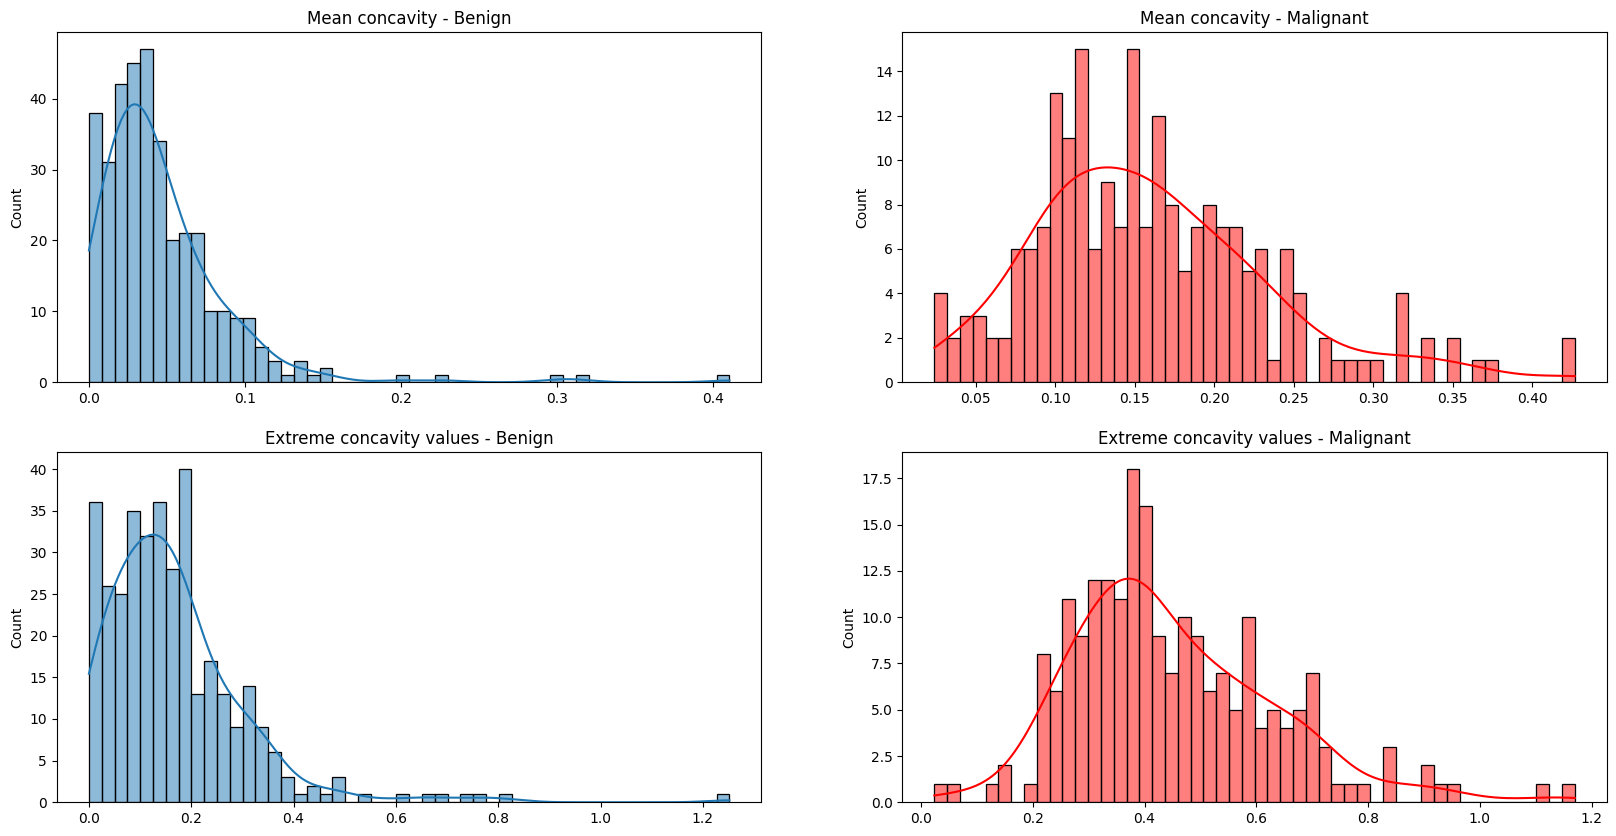

In [22]:
plot_comparison('concavity', b_tumor, m_tumor, bins=50)

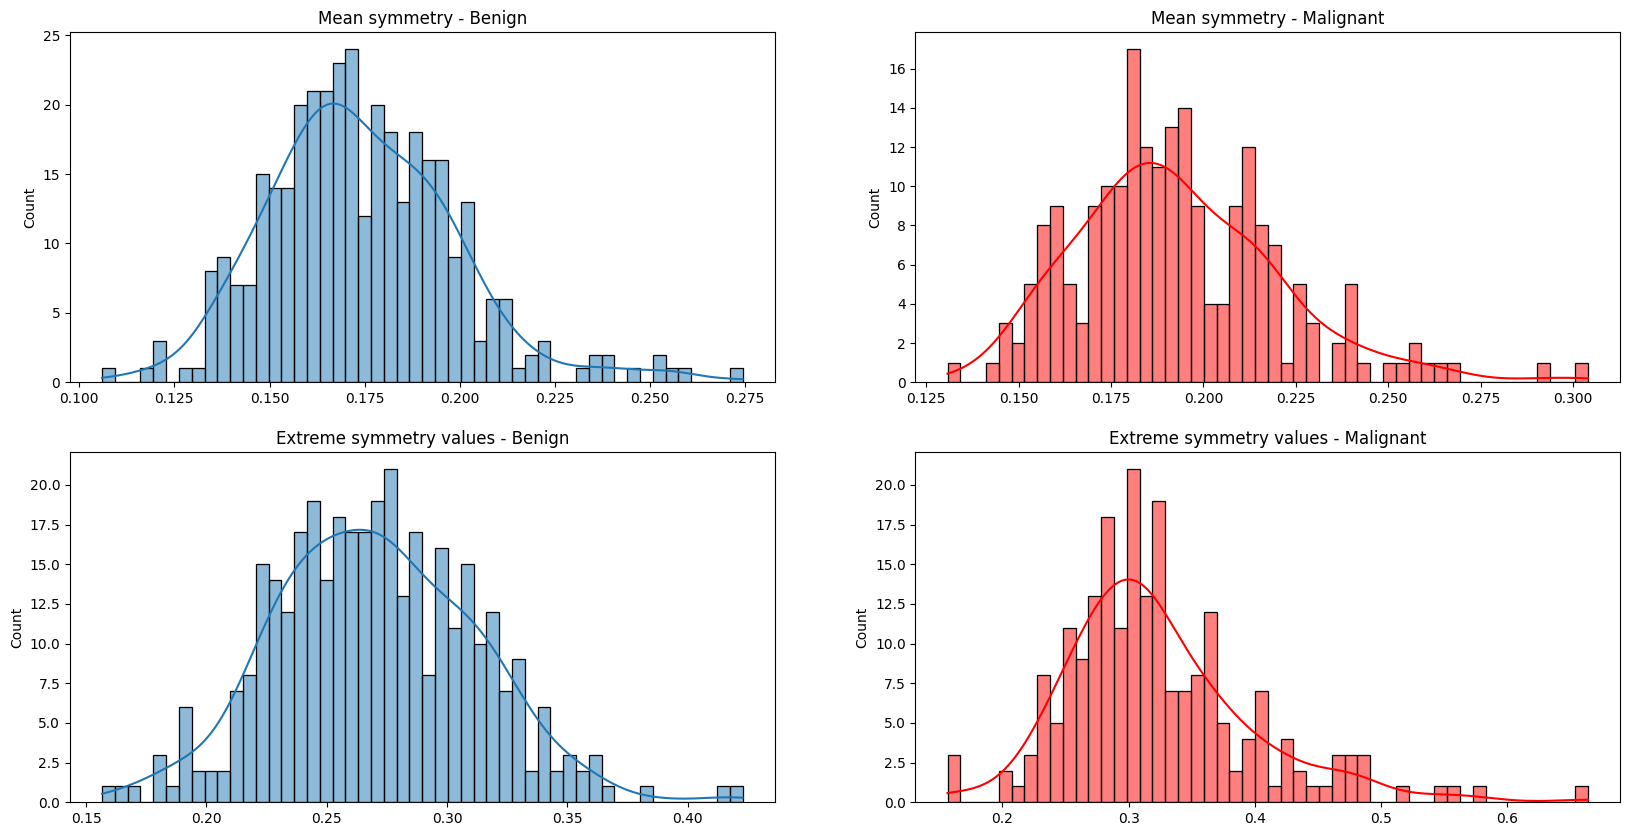

In [23]:
plot_comparison('symmetry', b_tumor, m_tumor, bins=50)

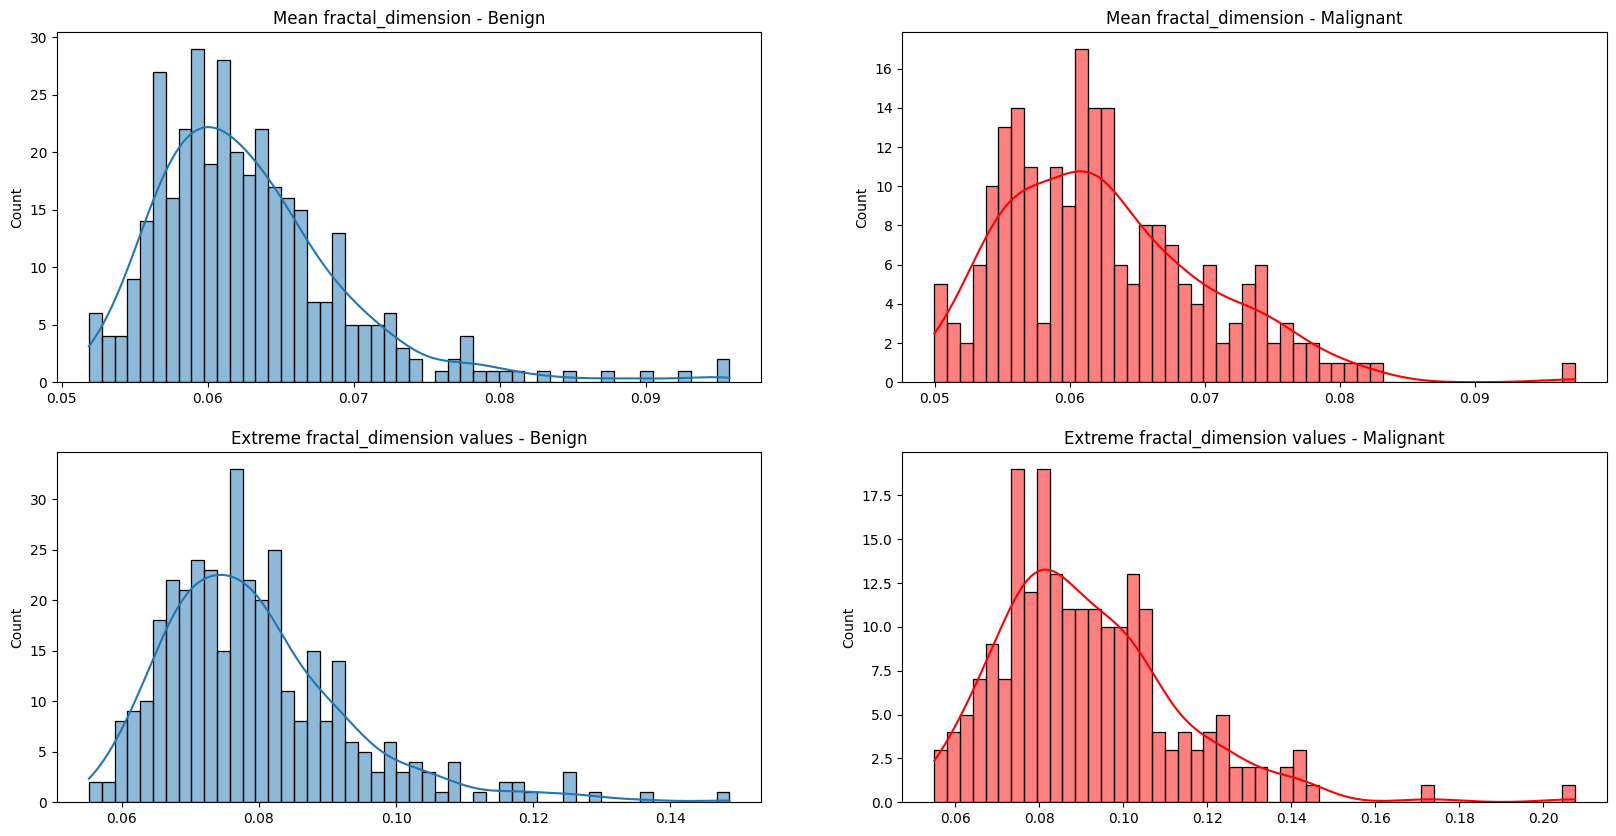

In [24]:
plot_comparison('fractal_dimension', b_tumor, m_tumor, bins=50)

Defining Malignant(M) as 1; Bening(B) as 0, so that it will be possible to use the dataset for further tasks

In [25]:
df['diagnosis'] = df['diagnosis'].replace({'M' : 1 , 'B' : 0})

In [26]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

Creating a correlation matrix

In [27]:
corr = df.corr()

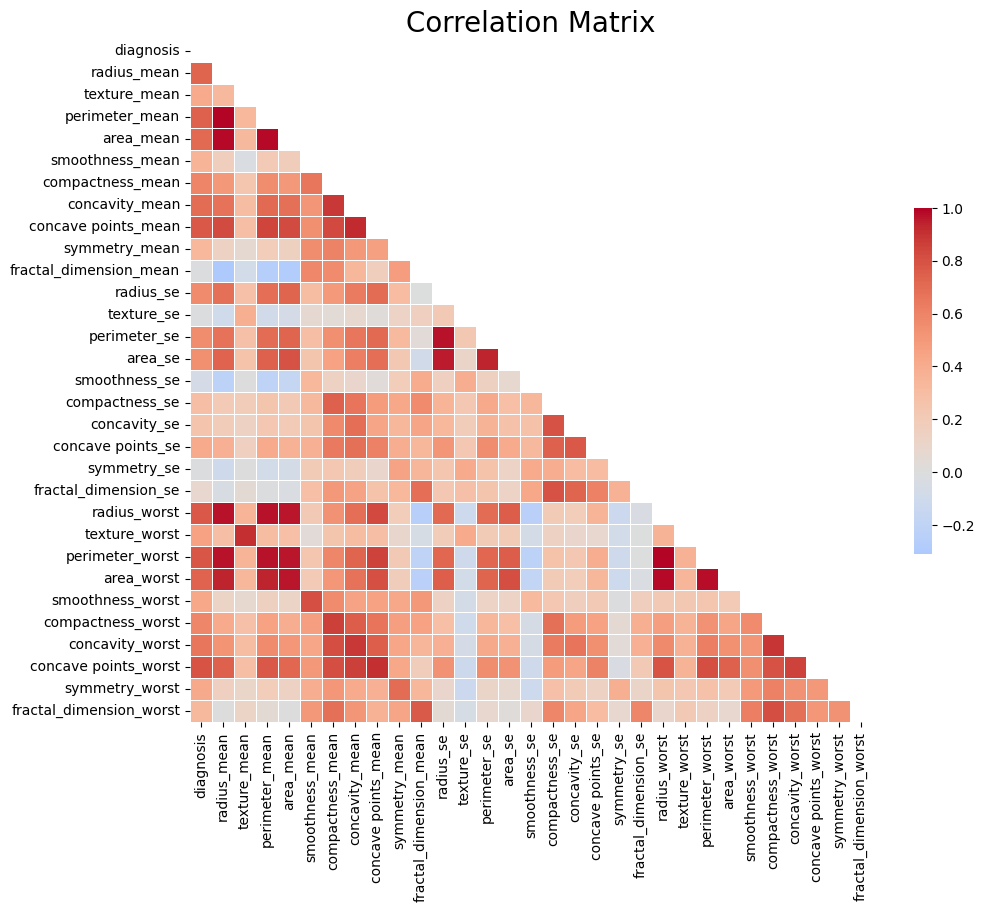

In [28]:
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix', fontsize=20)
plt.show()

Identify and remove outliers

In [29]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

In [30]:
df_no_outliers = df[~outliers]

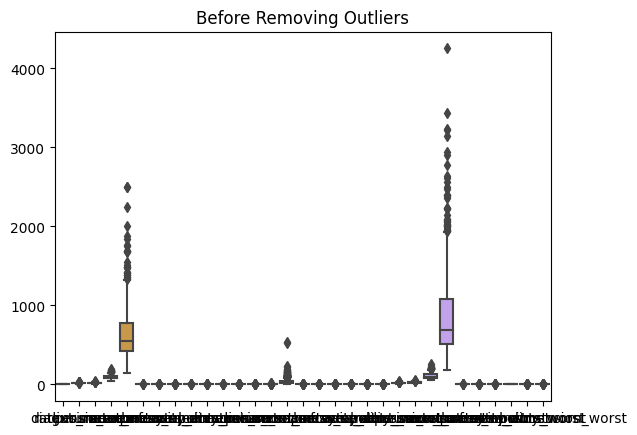

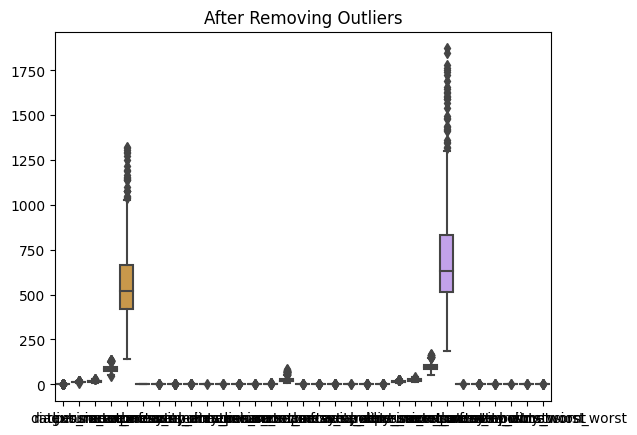

In [31]:
sns.boxplot(data=df)
plt.title('Before Removing Outliers')
plt.show()

# Visualize distribution after removing outliers
sns.boxplot(data=df_no_outliers)
plt.title('After Removing Outliers')
plt.show()

In [32]:
df=df_no_outliers

In [33]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
6            1        18.25         19.98          119.60     1040.0   
7            1        13.71         20.83           90.20      577.9   
10           1        16.02         23.24          102.70      797.8   
11           1        15.78         17.89          103.60      781.0   
13           1        15.85         23.95          103.70      782.7   
..         ...          ...           ...             ...        ...   
554          0        12.88         28.92           82.50      514.3   
555          0        10.29         27.61           65.67      321.4   
558          0        14.59         22.68           96.39      657.1   
560          0        14.05         27.15           91.38      600.4   
566          1        16.60         28.08          108.30      858.1   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
6            0.09463           0.10900         0.11270              0.07400   
7            0.11890           0.16450         0.09366              0.05985   
10           0.08206           0.06669         0.03299              0.03323   
11           0.09710           0.12920         0.09954              0.06606   
13           0.08401           0.10020         0.09938              0.05364   
..               ...               ...             ...                  ...   
554          0.08123           0.05824         0.06195              0.02343   
555          0.09030           0.07658         0.05999              0.02738   
558          0.08473           0.13300         0.10290              0.03736   
560          0.09929           0.11260         0.04462              0.04304   
566          0.08455           0.10230         0.09251              0.05302   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
6           0.1794  ...         22.88          27.66           153.20   
7           0.2196  ...         17.06          28.14           110.60   
10          0.1528  ...         19.19          33.88           123.80   
11          0.1842  ...         20.42          27.28           136.50   
13          0.1847  ...         16.84          27.66           112.00   
..             ...  ...           ...            ...              ...   
554         0.1566  ...         13.89          35.74            88.84   
555         0.1593  ...         10.84          34.91            69.57   
558         0.1454  ...         15.48          27.27           105.90   
560         0.1537  ...         15.30          33.17           100.20   
566         0.1590  ...         18.98          34.12           126.70   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
6        1606.0            0.1442             0.2576           0.3784   
7         897.0            0.1654             0.3682           0.2678   
10       1150.0            0.1181             0.1551           0.1459   
11       1299.0            0.1396             0.5609           0.3965   
13        876.5            0.1131             0.1924           0.2322   
..          ...               ...                ...              ...   
554       595.7            0.1227             0.1620           0.2439   
555       357.6            0.1384             0.1710           0.2000   
558       733.5            0.1026             0.3171           0.3662   
560       706.7            0.1241             0.2264           0.1326   
566      1124.0            0.1139             0.3094           0.3403   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
6                 0.19320          0.3063                  0.08368  
7                 0.15560          0.3196                  0.11510  
10                0.09975          0.2948                  0.08452  
11                0.18100          0.3792                  0.10480  
13                0.11190          0.2809                  0.06287  
..                    .

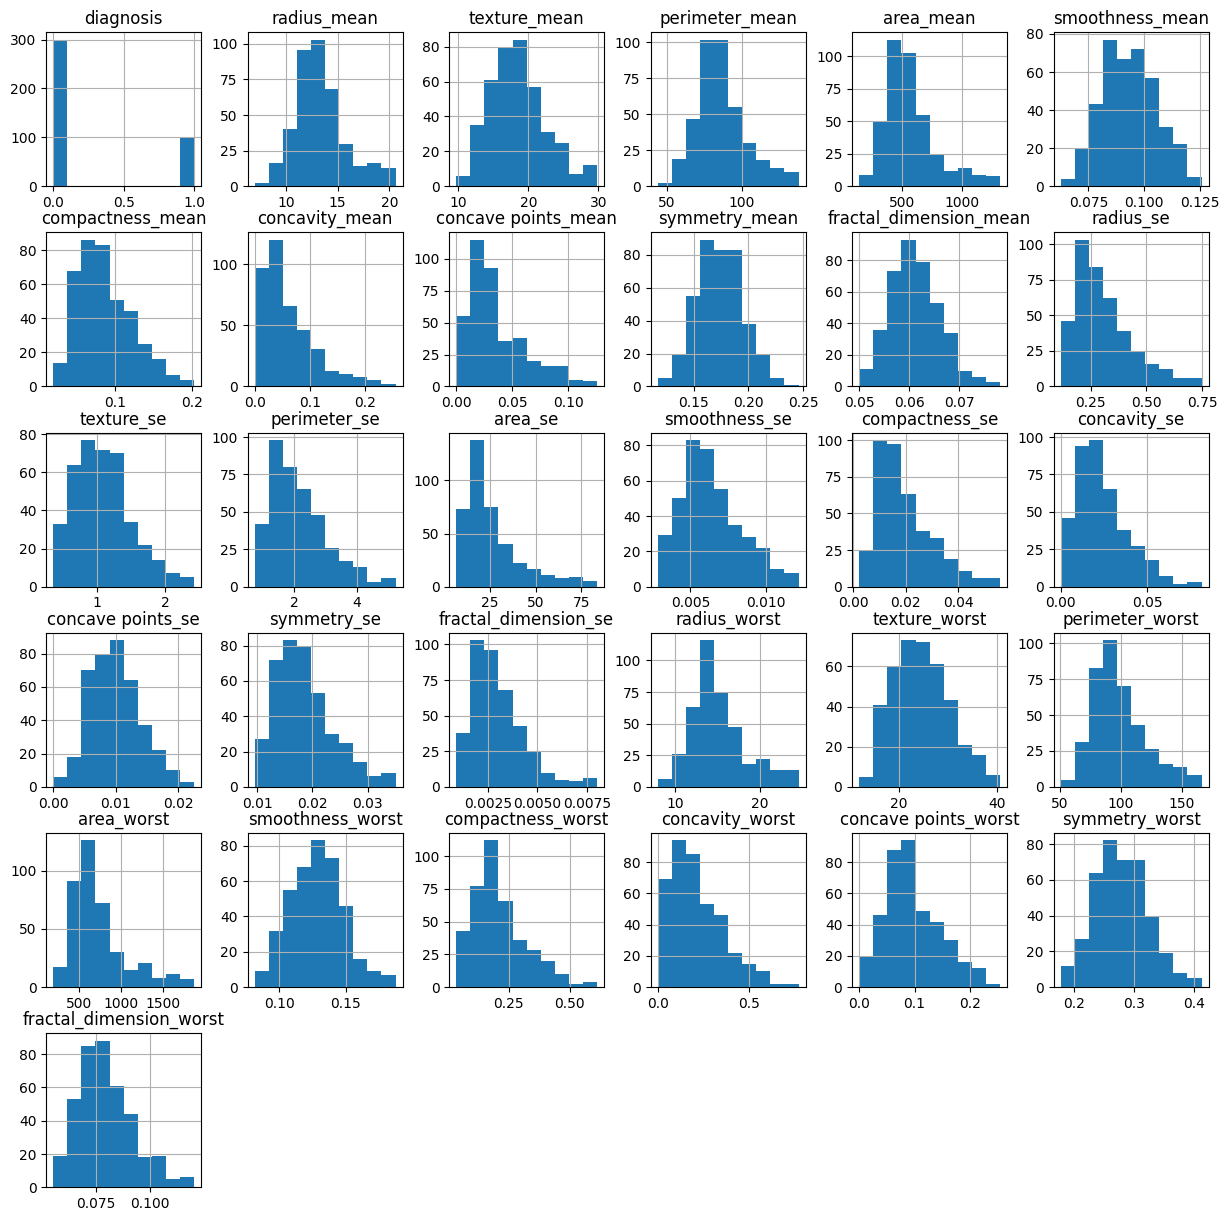

In [34]:
df.hist(figsize=(15, 15))
plt.show()

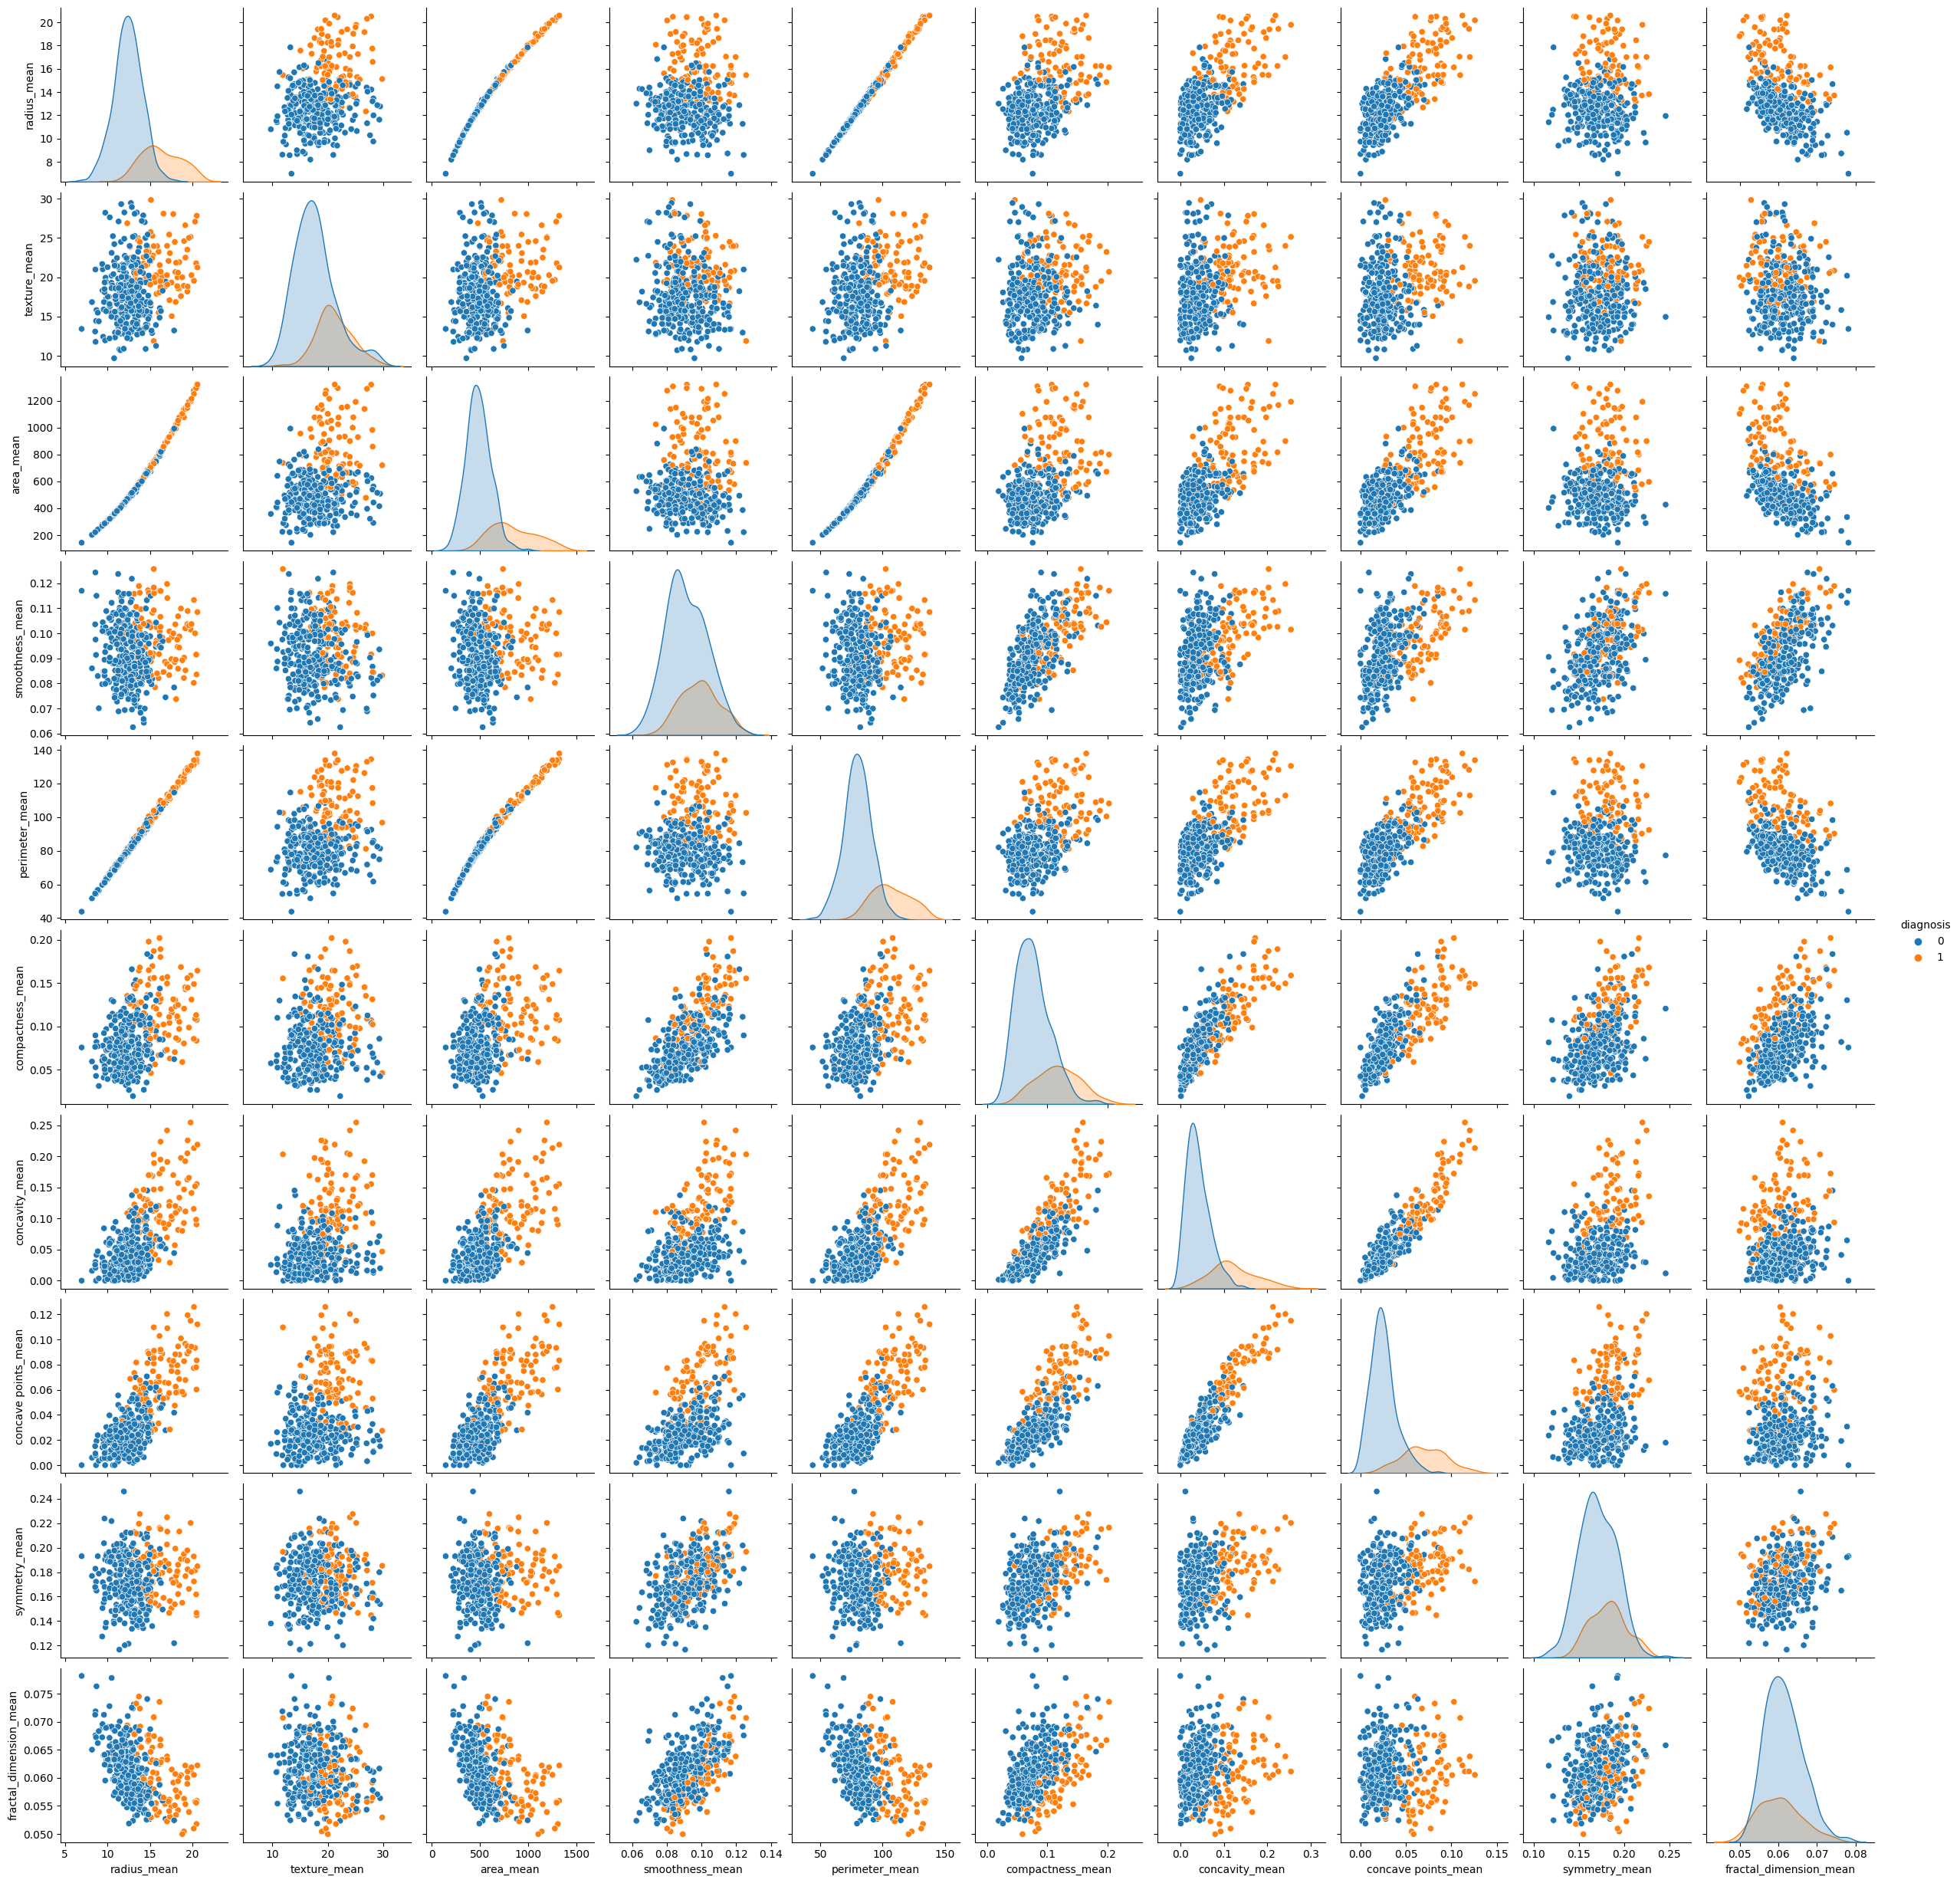

In [35]:
relevant_columns = df[['diagnosis', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'perimeter_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

# Create pair plot for selected columns
sns.pairplot(relevant_columns, hue='diagnosis')
plt.show()

Preprocess the data

In [63]:
scaler = preprocessing.StandardScaler()
X = df.drop(columns = 'diagnosis').values
X = scaler.fit_transform(X)
Y = df['diagnosis'].values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
normalized_x_train = scaler.fit_transform(x_train)
normalized_x_test = scaler.transform(x_test)
normalized_x_train

(318, 30) (80, 30) (318, 1) (80, 1)


array([[ 1.01878514, -0.14725086,  1.07675205, ...,  1.75297007,
         2.25613381,  1.95523038],
       [-0.05157859,  0.87569293, -0.02677874, ...,  1.34040636,
         2.03178888,  1.28935396],
       [-0.66673016,  0.40858339, -0.64652843, ..., -0.27529882,
         0.92819312,  0.77333837],
       ...,
       [-0.20331598, -0.25946153, -0.17063837, ..., -0.23952975,
        -1.83192934, -0.69205323],
       [ 0.64559319,  0.45816485,  0.62271408, ...,  0.14132956,
        -0.96854128, -1.04275844],
       [ 0.68660329,  0.34073508,  0.58507991, ..., -0.75614894,
        -0.3408287 , -1.43981236]])

Choosing 2 models: KNN and Decision Tree

In [64]:
models = [KNeighborsClassifier(),
          DecisionTreeClassifier(random_state=42)]
model_names = ['KNN', 'DecisionTree']

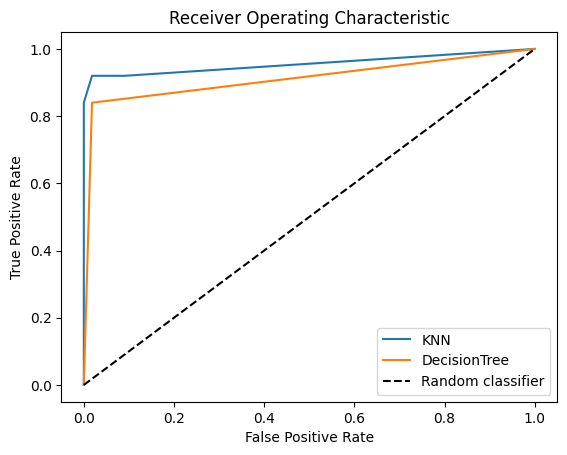

In [65]:
for model, name in zip(models, model_names):
    model.fit(x_train, y_train.ravel())  # Use ravel() to flatten y_train
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred_prob)  # Use ravel() to flatten y_test
    plt.plot(fpr, tpr, label=(name))

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

For both models printing Accuracy, F1-score, Recall and Precision

In [66]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for model, name in zip(models, model_names):
    model.fit(x_train, y_train.ravel())
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    precision_scores.append(precision)
    print('%s: Accuracy-score = %0.3f' % (name, accuracy))
    print('%s: F1-score = %0.3f' % (name, f1))
    print('%s: Precision = %0.3f' % (name, precision))
    print('%s: Recall = %0.3f' % (name, recall))
    print('\n')


KNN: Accuracy-score = 0.950
KNN: F1-score = 0.913
KNN: Precision = 1.000
KNN: Recall = 0.840


DecisionTree: Accuracy-score = 0.938
DecisionTree: F1-score = 0.894
DecisionTree: Precision = 0.955
DecisionTree: Recall = 0.840




As we can see, the KNN model works better, therefore in the next step i'm finding the best parameters for KNN to proceed with further analysis

In [67]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
n_neighbors = [3, 5, 7, 9]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

params_knn = {'n_neighbors': n_neighbors, 'weights': weights, 'algorithm': algorithm}

# Create KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV object for KNN
knn_grid = GridSearchCV(estimator=knn, param_grid=params_knn, refit=True, verbose=0, n_jobs=-1)

# Fit the model to the training data
knn_grid.fit(x_train, y_train.ravel())

# Print the best parameters and best score
print(f"Best parameters for KNN: {knn_grid.best_params_}")
print(f"Best score for KNN: {knn_grid.best_score_}")


Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Best score for KNN: 0.9527777777777778


Using the found best parameters for KNN finding cross-validation accuracy scores, mean accuracy and standart deviation of accuracy

In [68]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create KNN classifier with the best parameters
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')

# Define the number of folds
num_folds = 5

# Create StratifiedKFold object to ensure class distribution is similar in each fold
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores for each fold
cv_accuracy_scores = cross_val_score(knn, x_train, y_train.ravel(), cv=stratified_kfold, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validation Accuracy Scores:", cv_accuracy_scores)

# Calculate and print the mean accuracy and its standard deviation
mean_accuracy = cv_accuracy_scores.mean()
std_accuracy = cv_accuracy_scores.std()
print(f"\nMean Accuracy: {mean_accuracy}")
print(f"Standard Deviation of Accuracy: {std_accuracy}")


Cross-Validation Accuracy Scores: [0.96875    0.953125   0.96875    0.95238095 0.92063492]

Mean Accuracy: 0.9527281746031747
Standard Deviation of Accuracy: 0.017570729990701816


Creating KNN classifier with the best parameters from the grid search and train the model

In [69]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')

knn.fit(x_train, y_train.ravel())

y_pred = knn.predict(x_test)

Accuracy: 0.9625
F1 Score: 0.9361702127659575
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.88      0.94        25

    accuracy                           0.96        80
   macro avg       0.97      0.94      0.95        80
weighted avg       0.96      0.96      0.96        80



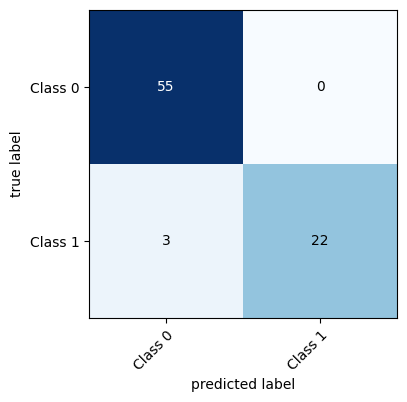

In [70]:
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(4, 4), class_names=['Class 0', 'Class 1'])
plt.show()

Neural networks

First NN that I chose is the MLP model with 3 layers. Since I have 2 classes I will be using the activation function sigmoid and for loss: binary-crossentropy

In [88]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.layers import Dense

np.random.seed(1337)

# Create MLP model with droupout layers with rate of 0.5
model = Sequential()
model.add(InputLayer(input_shape=normalized_x_train[0].shape))
model.add(Dense(64, activation="relu", name="layer1"))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu", name="layer2"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid", name="layer3"))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 64)                1984      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 layer2 (Dense)              (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 layer3 (Dense)              (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
recall = tf.keras.metrics.Recall()
precision = tf.keras.metrics.Precision()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall])

history = model.fit(normalized_x_train, y_train,
                    epochs = 100,
                    batch_size=5,
                    verbose=0,
                    validation_data=(normalized_x_test, y_test))

In [90]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_4', 'recall_4', 'val_loss', 'val_accuracy', 'val_precision_4', 'val_recall_4'])

In [91]:
score = model.evaluate(normalized_x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9035863876342773
Test accuracy: 0.949999988079071


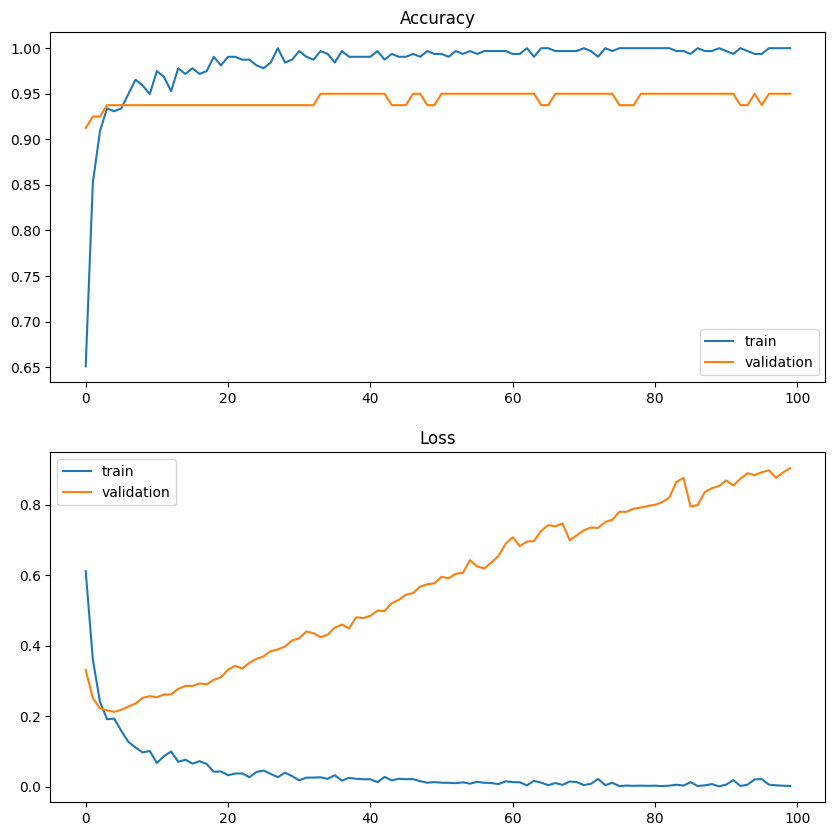

In [92]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax1.plot(train_accuracy, label='train')
ax1.plot(val_accuracy, label='validation')
ax1.set_title("Accuracy")

ax2.plot(train_loss, label='train')
ax2.plot(val_loss, label='validation')
ax2.set_title("Loss")

ax1.legend()
ax2.legend();

Second NN that i chose is autoencoder

In [94]:
# Create Autoencoder model
autoencoder = Sequential()

# Encoder
autoencoder.add(InputLayer(input_shape=normalized_x_train[0].shape))
autoencoder.add(Dense(64, activation='relu', name='encoder_layer1'))
autoencoder.add(Dense(32, activation='relu', name='encoder_layer2'))
autoencoder.add(Dense(3, activation='relu', name='encoder_dim'))

# Decoder
autoencoder.add(Dense(64, activation='relu', name='decoder_layer1'))
autoencoder.add(Dense(32, activation='relu', name='decoder_layer2'))
autoencoder.add(Dense(normalized_x_train[0].shape[0], activation='sigmoid', name='decoder_layer3'))

autoencoder.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_layer1 (Dense)      (None, 64)                1984      
                                                                 
 encoder_layer2 (Dense)      (None, 32)                2080      
                                                                 
 encoder_dim (Dense)         (None, 3)                 99        
                                                                 
 decoder_layer1 (Dense)      (None, 64)                256       
                                                                 
 decoder_layer2 (Dense)      (None, 32)                2080      
                                                                 
 decoder_layer3 (Dense)      (None, 30)                990       
                                                                 
Total params: 7489 (29.25 KB)
Trainable params: 7489 

In [80]:
autoencoder.compile(loss='mean_squared_error',
              metrics=['MeanSquaredError', 'MeanAbsoluteError'],
              optimizer='adam')

# Train the autoencoder
autoencoder.fit(normalized_x_train, normalized_x_train,
                epochs=100,
                batch_size=5,
                verbose=0,
                validation_data=(normalized_x_test, normalized_x_test))

In [81]:
history = autoencoder.fit(normalized_x_train, normalized_x_train,
                epochs=100,
                batch_size=5,
                verbose=0,
                validation_data=(normalized_x_test, normalized_x_test))

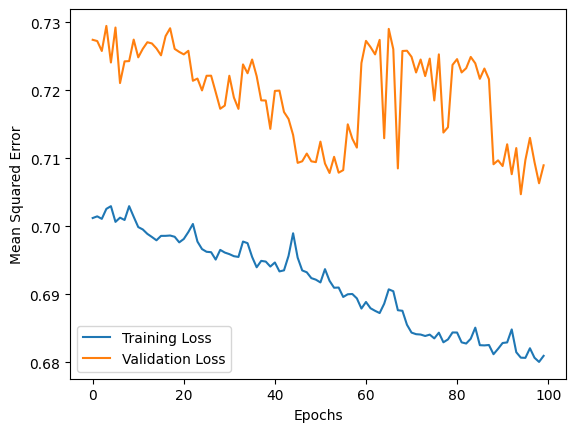

In [82]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error

# Use the autoencoder to predict on both training and test sets
pred_train = autoencoder.predict(normalized_x_train)
pred_test = autoencoder.predict(normalized_x_test)

print('---------- Evaluation on Training Data ----------')
print("MSE =", mean_squared_error(normalized_x_train, pred_train))
print("")

print('---------- Evaluation on Test Data ----------')
print("MSE =", mean_squared_error(normalized_x_test, pred_test))
print("")

3/3 [==============================] - 0s 4ms/step
---------- Evaluation on Training Data ----------
MSE = 0.6793119983898392

---------- Evaluation on Test Data ----------
MSE = 0.7089549885413394



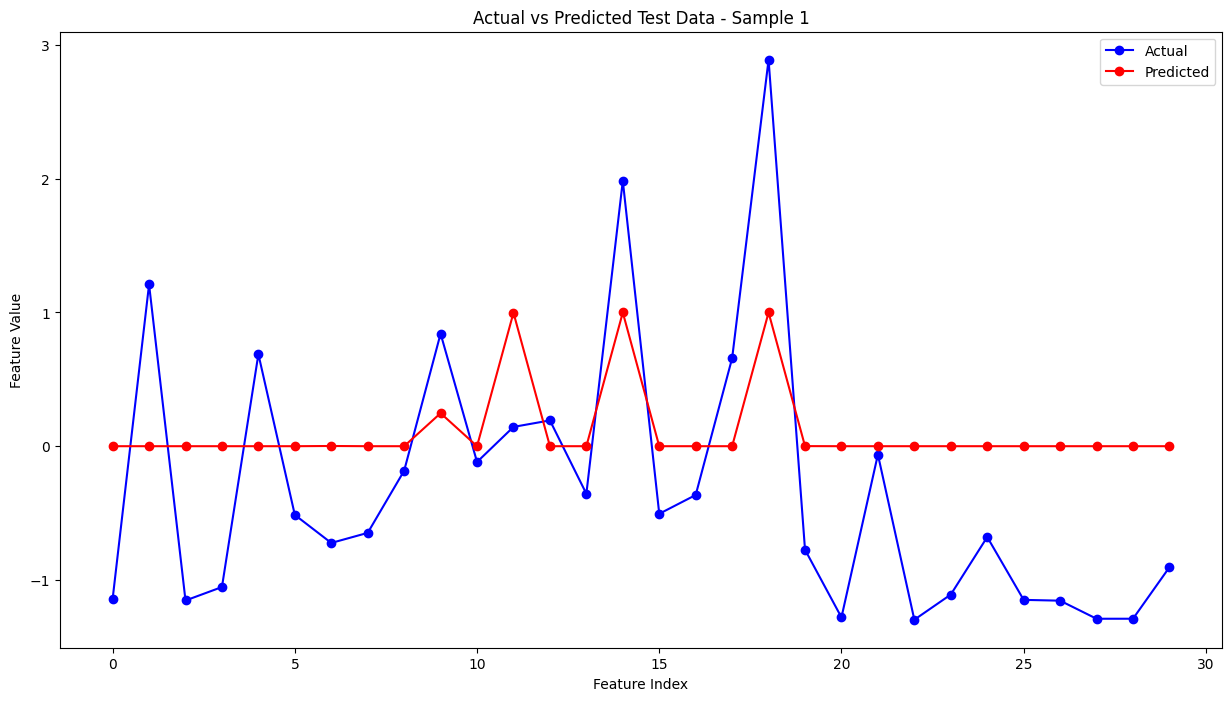

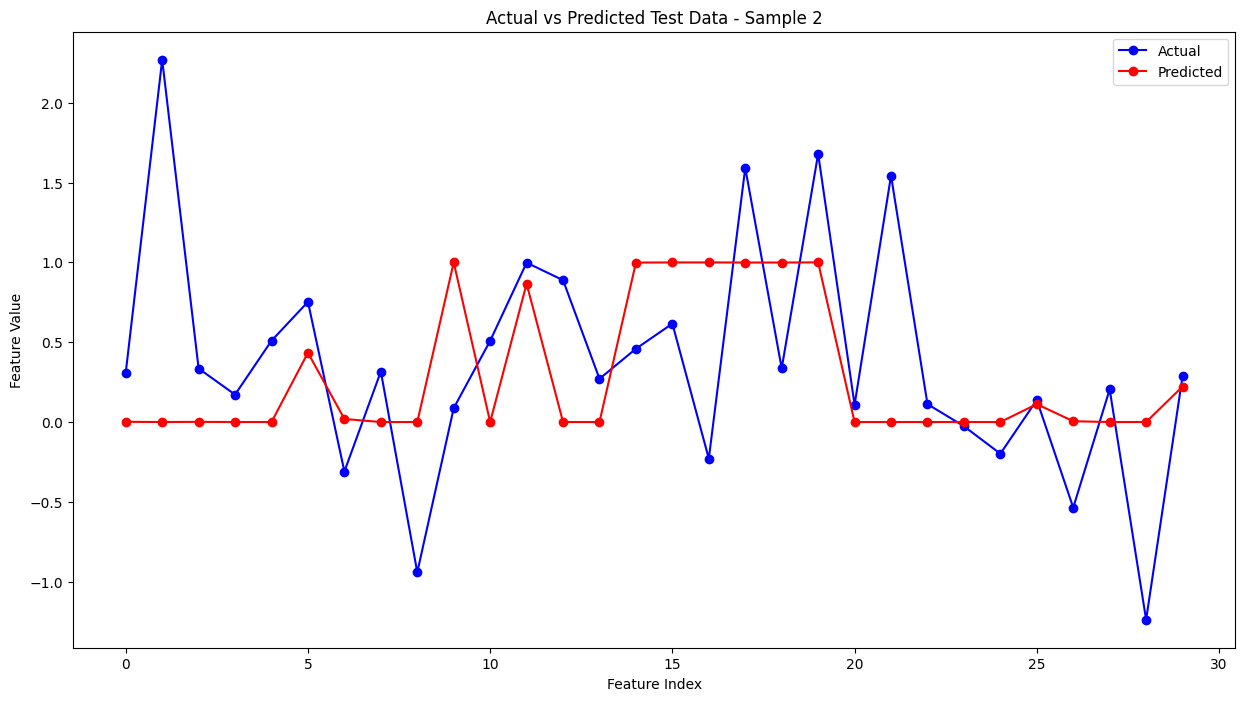

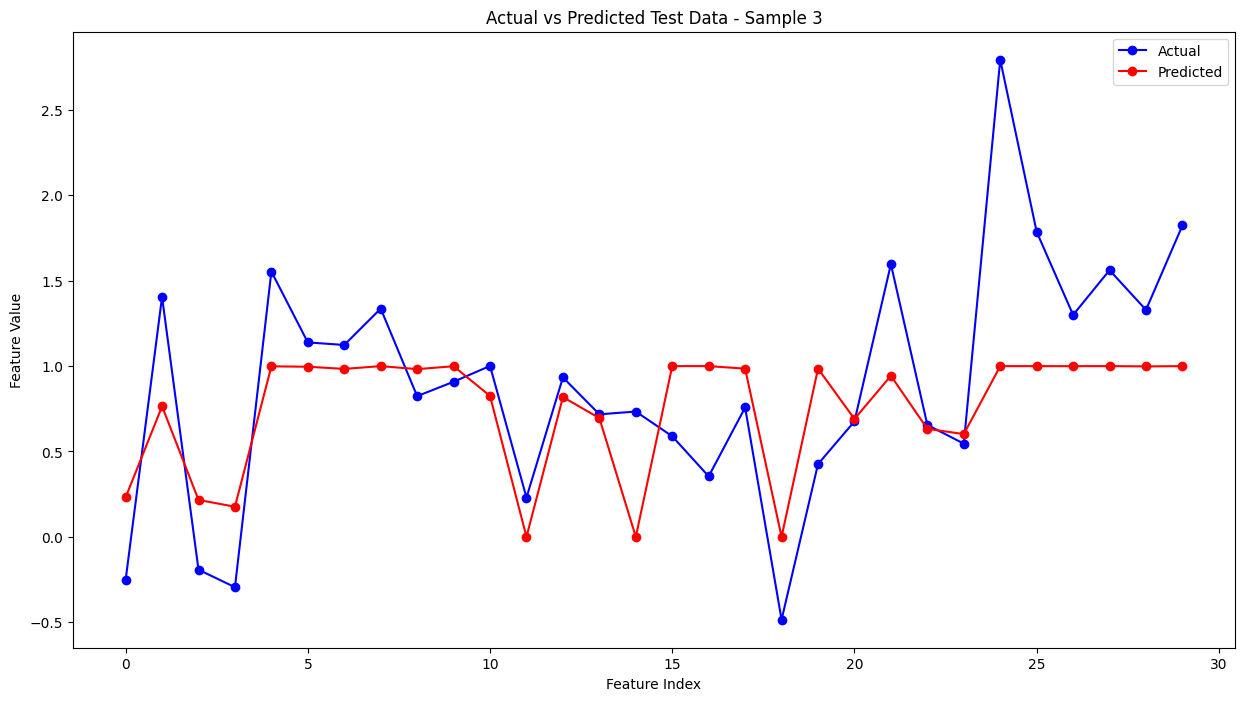

In [86]:
# Visualize the original and reconstructed data for a few samples as line graphs
num_samples = 3
for i in range(num_samples):
    plt.figure(figsize=(15, 8))

    # Plot the actual and predicted test data on the same graph
    plt.plot(normalized_x_test[i], label='Actual', marker='o', color='blue')
    plt.plot(pred_test[i], label='Predicted', marker='o', color='red')

    plt.title(f'Actual vs Predicted Test Data - Sample {i+1}')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')
    plt.legend()

    plt.show()


Let's make the MLP with 5 layers

In [99]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.layers import Dense

np.random.seed(1337)

# Create MLP model with droupout layers with rate of 0.5
model2 = Sequential()
model2.add(InputLayer(input_shape=normalized_x_train[0].shape))
model2.add(Dense(256, activation="relu", name="layer1"))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation="relu", name="layer2"))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation="relu", name="layer3"))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation="relu", name="layer4"))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation="sigmoid", name="layer5"))

model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 256)               7936      
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 layer2 (Dense)              (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 layer3 (Dense)              (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 layer4 (Dense)              (None, 32)              

In [104]:
recall = tf.keras.metrics.Recall()
precision = tf.keras.metrics.Precision()

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall])

history2 = model2.fit(normalized_x_train, y_train,
                    epochs=100,
                    batch_size=5,
                    verbose=0,
                    validation_data=(normalized_x_test, y_test))

In [106]:
history2.history.keys()

dict_keys(['loss', 'accuracy', 'precision_9', 'recall_9', 'val_loss', 'val_accuracy', 'val_precision_9', 'val_recall_9'])

In [107]:
score = model2.evaluate(normalized_x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8115962743759155
Test accuracy: 0.949999988079071


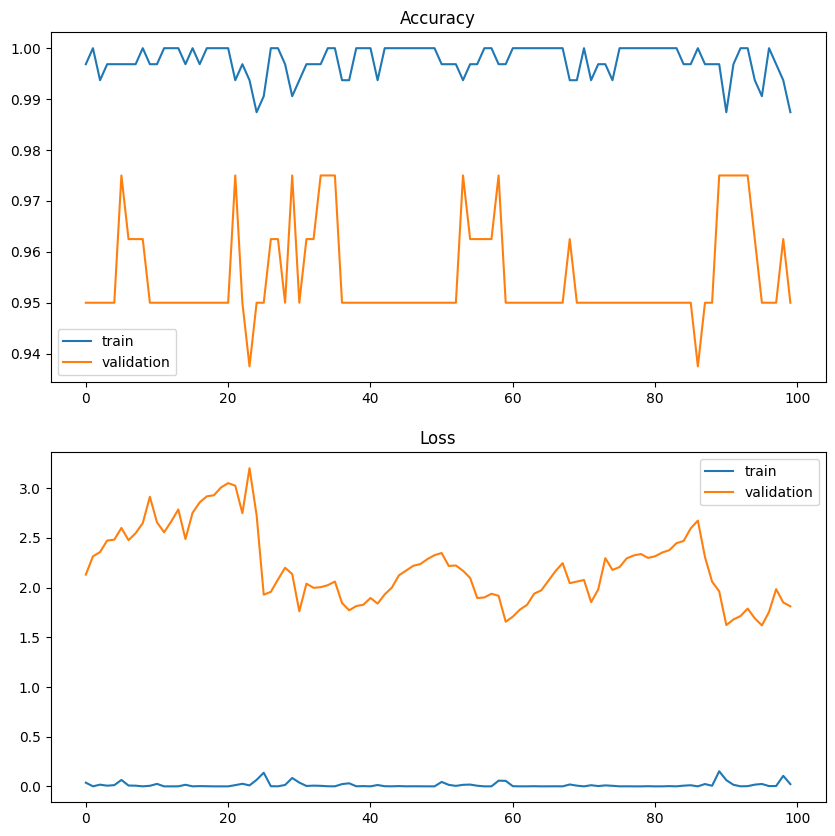

In [108]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

train_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

ax1.plot(train_accuracy, label='train')
ax1.plot(val_accuracy, label='validation')
ax1.set_title("Accuracy")

ax2.plot(train_loss, label='train')
ax2.plot(val_loss, label='validation')
ax2.set_title("Loss")

ax1.legend()
ax2.legend();